In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import pickle

In [5]:
save_location = './Guatemala 2021 images/sorted_cherries'
save_series_filename = 'saved_HSV_series.pkl'
fig_filename = 'HSV_distributions.png'
cherries = ['red_ripe', 'red_underripe', 'red_overripe', 'yellow_ripe', 'yellow_overripe']
foldernames = {cherries[i]: cherries[i] for i in range(len(cherries))}
colors = {cherries[0]:'red',cherries[1]:'green', cherries[2]:'brown', cherries[3]:'yellow', cherries[4]: 'orange'}

In [19]:
s_hue = {}
s_sat = {}
s_val = {}
for cherry in cherries:
    s_hue[cherry] = pd.Series([], dtype='float64')
    s_sat[cherry] = pd.Series([], dtype='float64')
    s_val[cherry] = pd.Series([], dtype='float64')  

In [20]:
s_hue

{'red_ripe': Series([], dtype: float64),
 'red_underripe': Series([], dtype: float64),
 'red_overripe': Series([], dtype: float64),
 'yellow_ripe': Series([], dtype: float64),
 'yellow_overripe': Series([], dtype: float64)}

In [21]:
for cherry in cherries:

    # get all the files
    file_location = os.path.join(save_location, foldernames[cherry]) 
    files = [file for file in os.listdir(file_location) if file.endswith(".jpg")]
    
    print('processing imgs for cherry : {}'.format(cherry))
    # accumulate all pixels into a pandas series each for Hue, Saturation, Value
    for i, curr_file in tqdm(enumerate(files)):
        img = cv2.imread(os.path.join(file_location,curr_file))
        
        img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        hue = pd.Series(img_HSV[:,:,0].ravel())
        sat = pd.Series(img_HSV[:,:,1].ravel())
        val = pd.Series(img_HSV[:,:,2].ravel())
        
        s_hue[cherry] = pd.concat([s_hue[cherry], hue], ignore_index=True)
        s_sat[cherry] = pd.concat([s_sat[cherry], sat], ignore_index=True)
        s_val[cherry] = pd.concat([s_val[cherry], val], ignore_index=True)

3it [00:00, 29.61it/s]

['IMG-20210217-WA0002.jpg', 'IMG-20210217-WA0033.jpg', 'IMG-20210217-WA0043.jpg', 'IMG-20210217-WA0048.jpg', 'IMG-20210217-WA0066.jpg', 'IMG-20210217-WA0075.jpg', 'IMG-20210217-WA0133.jpg', 'IMG-20210217-WA0136.jpg', 'IMG-20210217-WA0137.jpg', 'IMG-20210217-WA0155.jpg', 'IMG-20210217-WA0157.jpg', 'IMG-20210217-WA0168.jpg', 'IMG-20210217-WA0173.jpg', 'IMG-20210217-WA0179.jpg', 'IMG-20210217-WA0181.jpg', 'IMG-20210217-WA0194.jpg', 'IMG-20210217-WA0196.jpg', 'IMG-20210217-WA0209.jpg']


18it [00:01, 15.27it/s]
4it [00:00, 29.90it/s]

['IMG-20210217-WA0003.jpg', 'IMG-20210217-WA0025.jpg', 'IMG-20210217-WA0028.jpg', 'IMG-20210217-WA0042.jpg', 'IMG-20210217-WA0087.jpg', 'IMG-20210217-WA0089.jpg', 'IMG-20210217-WA0107.jpg', 'IMG-20210217-WA0112.jpg', 'IMG-20210217-WA0113.jpg', 'IMG-20210217-WA0120.jpg']


10it [00:00, 19.49it/s]
4it [00:00, 28.73it/s]

['IMG-20210217-WA0018(1).jpg', 'IMG-20210217-WA0018.jpg', 'IMG-20210217-WA0032(1).jpg', 'IMG-20210217-WA0032.jpg', 'IMG-20210217-WA0044(1).jpg', 'IMG-20210217-WA0044.jpg', 'IMG-20210217-WA0047.jpg', 'IMG-20210217-WA0053(1).jpg', 'IMG-20210217-WA0053.jpg', 'IMG-20210217-WA0054(1).jpg', 'IMG-20210217-WA0054.jpg', 'IMG-20210217-WA0062(1).jpg', 'IMG-20210217-WA0062.jpg', 'IMG-20210217-WA0063(1).jpg', 'IMG-20210217-WA0063.jpg', 'IMG-20210217-WA0064(1).jpg', 'IMG-20210217-WA0064.jpg', 'IMG-20210217-WA0077(1).jpg', 'IMG-20210217-WA0077.jpg', 'IMG-20210217-WA0090(1).jpg', 'IMG-20210217-WA0090.jpg', 'IMG-20210217-WA0095(1).jpg', 'IMG-20210217-WA0095.jpg', 'IMG-20210217-WA0104(1).jpg', 'IMG-20210217-WA0104.jpg', 'IMG-20210217-WA0127.jpg', 'IMG-20210217-WA0143.jpg', 'IMG-20210217-WA0151.jpg', 'IMG-20210217-WA0187.jpg', 'IMG-20210217-WA0192.jpg', 'IMG-20210217-WA0205.jpg', 'IMG-20210217-WA0213.jpg']


32it [00:03, 10.28it/s]
0it [00:00, ?it/s]
4it [00:00, 31.30it/s]

[]
['IMG-20210217-WA0034(1).jpg', 'IMG-20210217-WA0034.jpg', 'IMG-20210217-WA0037(1).jpg', 'IMG-20210217-WA0037.jpg', 'IMG-20210217-WA0038.jpg', 'IMG-20210217-WA0045.jpg', 'IMG-20210217-WA0046.jpg', 'IMG-20210217-WA0049.jpg', 'IMG-20210217-WA0055.jpg', 'IMG-20210217-WA0056.jpg', 'IMG-20210217-WA0057(1).jpg', 'IMG-20210217-WA0057.jpg', 'IMG-20210217-WA0059.jpg', 'IMG-20210217-WA0061.jpg', 'IMG-20210217-WA0069.jpg', 'IMG-20210217-WA0070.jpg', 'IMG-20210217-WA0071.jpg', 'IMG-20210217-WA0086.jpg', 'IMG-20210217-WA0088(1).jpg', 'IMG-20210217-WA0088.jpg', 'IMG-20210217-WA0092.jpg', 'IMG-20210217-WA0094.jpg', 'IMG-20210217-WA0096.jpg', 'IMG-20210217-WA0097.jpg', 'IMG-20210217-WA0098.jpg', 'IMG-20210217-WA0100.jpg', 'IMG-20210217-WA0101.jpg', 'IMG-20210217-WA0117.jpg', 'IMG-20210217-WA0161.jpg', 'IMG-20210217-WA0169.jpg', 'IMG-20210217-WA0174.jpg', 'IMG-20210217-WA0175.jpg', 'IMG-20210217-WA0180.jpg', 'IMG-20210217-WA0185.jpg']


34it [00:03,  9.87it/s]


In [22]:
with open(os.path.join(save_location,save_series_filename), 'wb') as handle:
    pickle.dump([s_hue, s_sat, s_val], handle, protocol = pickle.HIGHEST_PROTOCOL)

C:\Users\tracy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tracy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tracy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

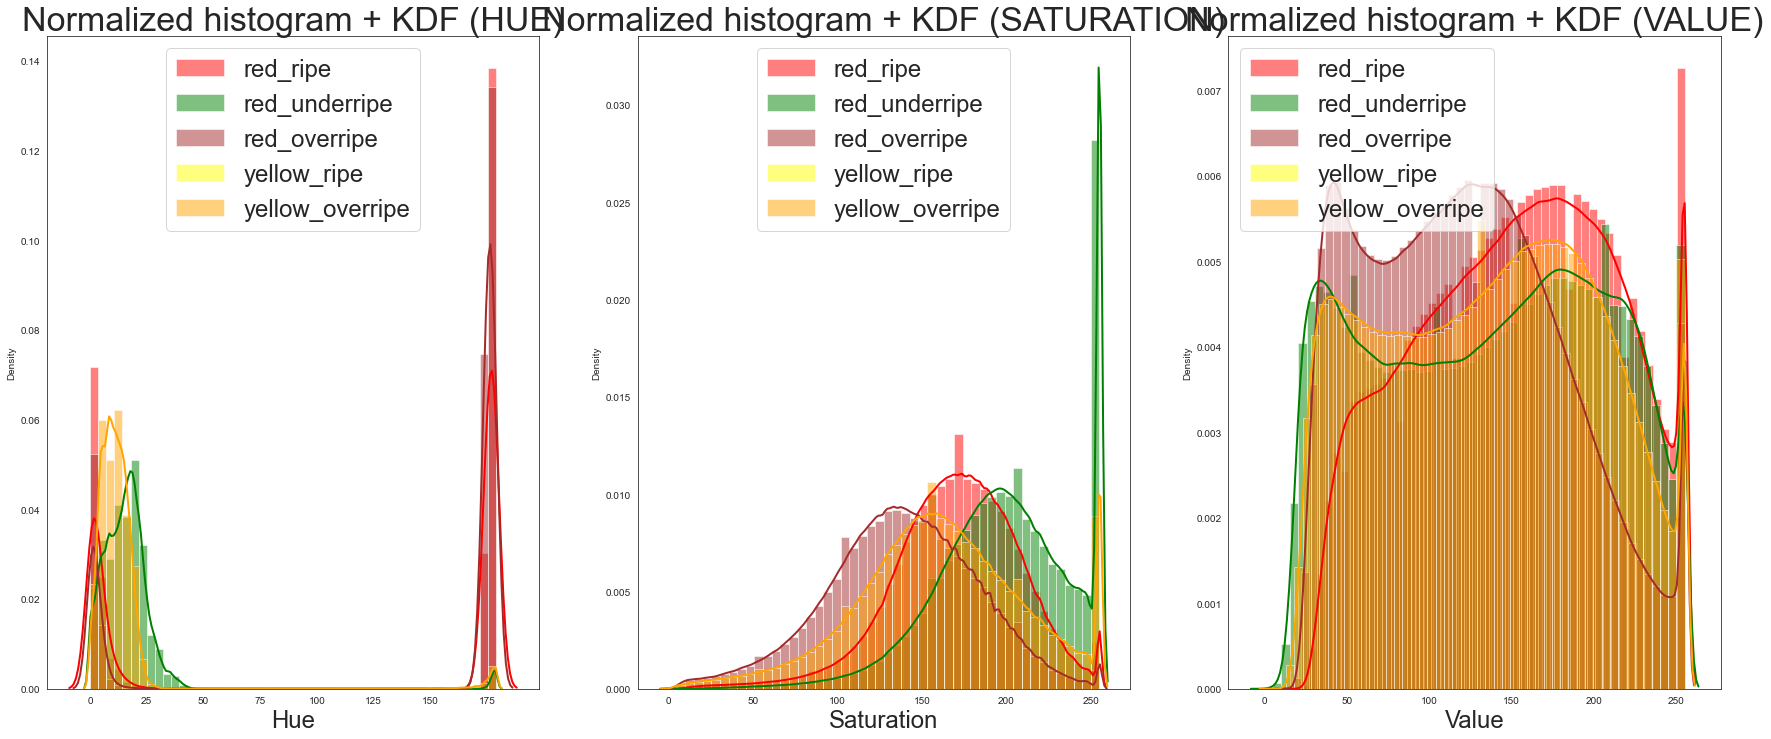

In [26]:
fig = plt.figure(figsize =(30, 12))
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

ax0 = fig.add_subplot(1, 3, 1)
ax0.set_title('Normalized histogram + KDF (HUE)', fontsize = 34)
for cherry in cherries:
    sns.displot(s_hue[cherry], ax=ax0, color=colors[cherry], label = cherry, **kwargs)
ax0.legend(fontsize = 24)
ax0.set_xlabel("Hue", fontsize = 24)

ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title('Normalized histogram + KDF (SATURATION)', fontsize = 34)
for cherry in cherries:
    sns.displot(s_sat[cherry], ax=ax1, color=colors[cherry], label = cherry, **kwargs)
ax1.set_xlabel("Saturation", fontsize = 24)
ax1.legend(fontsize = 24)

ax2 = fig.add_subplot(1, 3, 3)
ax2.set_title('Normalized histogram + KDF (VALUE)', fontsize = 34)
for cherry in cherries:
    sns.displot(s_val[cherry], ax=ax2, color=colors[cherry], label = cherry, **kwargs)
ax2.set_xlabel("Value", fontsize = 24)
ax2.legend(fontsize = 24)

plt.savefig(os.path.join(save_location, fig_filename), dpi = 80)
plt.show()